In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

### KNN Algorithm with Bomechanical Features of Orthopedic Patients

* The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other.


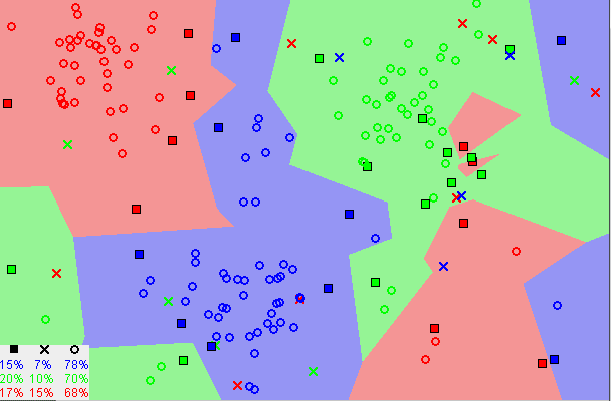

* Notice in the image above that most of the time, similar data points are close to each other. The KNN algorithm hinges on this assumption being true enough for the algorithm to be useful. KNN captures the idea of similarity (sometimes called distance, proximity, or closeness) with some mathematics we might have learned in our childhood— calculating the distance between points on a graph.

* There are other ways of calculating distance, and one way might be preferable depending on the problem we are solving. However, the straight-line distance (also called the Euclidean distance) is a popular and familiar choice.

# Reading Data

In [ ]:
df1 = pd.read_csv("/kaggle/input/biomechanical-features-of-orthopedic-patients/column_2C_weka.csv")
df1.head()

**Dependent(y) and Independent(x) Data Slice**

In [ ]:
x = df1.iloc[:,:-1].values   # Independent Variables
y = df1.iloc[:,-1:]          # Dependent Variables

**Train and Test Models**
* In this part, I slice our data, becauese I will give KNN Algorithm train data.After that the algorithm will predict our test model.

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

**Creating KNN Algorithm**
* In here, I create KNN Algorithm. First of all I choose a K value (K=3) and I give train data. Later, I take our prediction results.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
print("\nK=3 for Accuracy: {}".format(knn.score(x_test,y_test)))

# Finding the Best K Value
* The succes of KNN algorithm is dependent of k value. So I write a 'for' block and plot accuracy of the algorithm. This way, we should choose easily.

In [ ]:
scoreList = []
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    score = knn.score(x_test,y_test)
    scoreList.append(score)
    
plt.plot(range(1,20),scoreList)
plt.grid()
plt.show()

***Training with best K value ( K = 18 )***

In [ ]:
knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(x_train,y_train)
print("\n K = 18 => Accuracy: {} ".format(knn.score(x_test,y_test)))

# CONCLUSION
* In this data, I found the best K value. The best K value is 18 for this data. 
* If we choose the best K value, our algorithm's accuracy will be %88.17 . 